<a href="https://colab.research.google.com/github/sutharimanikanta/Golab/blob/main/Brain_tumor_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/SartajBhuvaji/Brain-Tumor-Classification-DataSet

Cloning into 'Brain-Tumor-Classification-DataSet'...
remote: Enumerating objects: 3039, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 3039 (delta 0), reused 0 (delta 0), pack-reused 3035
Receiving objects: 100% (3039/3039), 79.25 MiB | 17.11 MiB/s, done.
Updating files: 100% (3264/3264), done.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
import pickle
import time
import numpy as np
import keras.optimizers
from sklearn.metrics import classification_report

In [ ]:
print(tf.__version__)

2.15.0


In [ ]:
tensorboard = TensorBoard(log_dir='./logs', histogram_freq=0,
                          write_graph=True, write_images=False)

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [ ]:
import keras
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import imutils
import cv2
import PIL.Image
import os
%matplotlib inline

demo_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.05,
    height_shift_range=0.05,
    rescale=1./255,
    shear_range=0.05,
    brightness_range=[0.1, 1.5],
    horizontal_flip=True,
    vertical_flip=True
)

In [ ]:
#make output_dir
import os
output_folders=["glioma_tumor_o","meningioma_tumor_o","no_tumor_o","pituitary_tumor_o"]
def mkdir():
    for output_folder in output_folders:
        os.mkdir(output_folder)
mkdir()



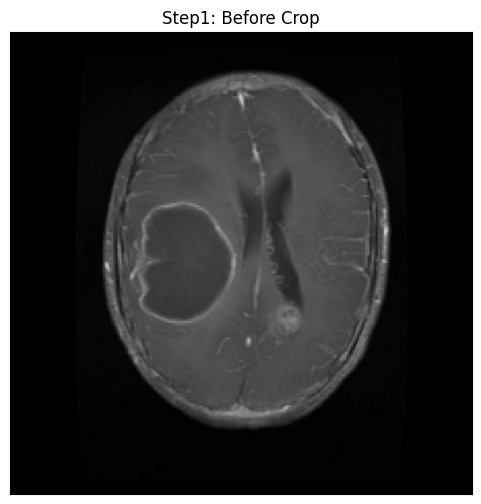

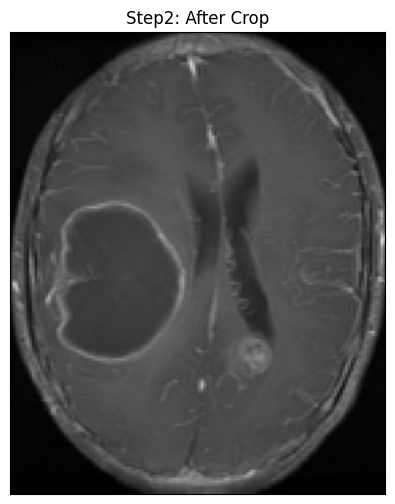

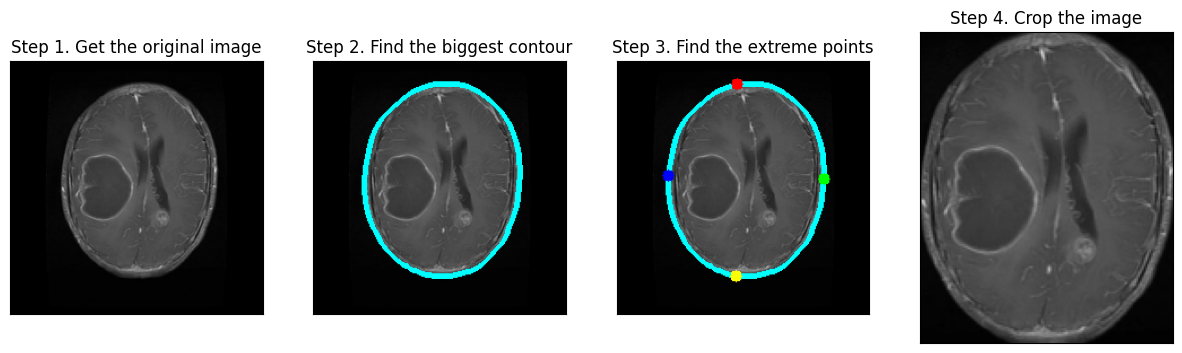

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

def cropAndAugmentation():
    # Augmentation Code
    flag1 = 0
    flag2 = 0
    j = 0
    IMG_SIZE = 224
    dim = (IMG_SIZE, IMG_SIZE)
    cwd = os.getcwd()
    directory = ["glioma_tumor", "meningioma_tumor", "no_tumor", "pituitary_tumor"]
    directory_output = ["glioma_tumor_o", "meningioma_tumor_o", "no_tumor_o", "pituitary_tumor_o"]
    desired_folder = "Brain-Tumor-Classification-DataSet/Training/"

    for input_folder in directory:
        for output_folder in directory_output:
            input_folder_path = os.path.join(cwd, desired_folder+input_folder)  # Construct input folder path
            output_folder_path = os.path.join(cwd, desired_folder+output_folder)  # Construct output folder path
            if not os.path.exists(input_folder_path):
                raise FileNotFoundError(f"Input folder {input_folder_path} does not exist.")


            for img in os.listdir(input_folder_path):
                image_path = os.path.join(input_folder_path, img)  # Construct full image path
                image = cv2.imread(image_path)  #
                image = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
                # use inter_cubic
                gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)  # convert into gray image
                gray = cv2.GaussianBlur(gray, (5, 5), 0)  # blur the image to reduce noise
                # print original image
                if flag1 == 0:
                    plt.figure(figsize=(15, 6))
                    plt.imshow(image)
                    plt.xticks([])  # to remove tickmarks
                    plt.yticks([])
                    plt.title('Step1: Before Crop')
                    plt.show()
                    flag1 = 1
                # threshold the image, then perform a series of erosion
                # 45 min,255 max that means <45 set to 0 and >45 set to 255
                thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
                thresh = cv2.erode(thresh, None, iterations=2)
                thresh = cv2.dilate(thresh, None, iterations=2)
                # find contours in thresholded image, then grab the largest one
                cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
                cnts = imutils.grab_contours(cnts)
                c = max(cnts, key=cv2.contourArea)
                 # find the extreme points
                extLeft = tuple(c[c[:, :, 0].argmin()][0])
                extRight = tuple(c[c[:, :, 0].argmax()][0])
                extTop = tuple(c[c[:, :, 1].argmin()][0])
                extBot = tuple(c[c[:, :, 1].argmax()][0])
                # add contour on the image
                #to draw a countores on the image  like border
                img_cnt = cv2.drawContours(image.copy(), [c], -1, (0, 255, 255), 4)
                # add extreme points
                img_pnt = cv2.circle(img_cnt.copy(), extLeft, 5, (0, 0, 255), -1)
                img_pnt = cv2.circle(img_pnt, extRight, 5, (0, 255, 0), -1)
                img_pnt = cv2.circle(img_pnt, extTop, 5, (255, 0, 0), -1)
                img_pnt = cv2.circle(img_pnt, extBot, 5, (255, 255, 0), -1)
                # apply crop
                ADD_PIXELS = 0
                new_image = image[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()
         # print after crop
               # '''  # Comment this section during execution
                if flag2==0:
                  plt.figure(figsize=(15,6))
                  plt.imshow(new_image)
                  plt.xticks([])
                  plt.yticks([])
                  plt.title('Step2: After Crop')
                  plt.show()
                 #plot_crops()
                  flag2=1
               # '''  #Display crops----------------------------------------------------------
                  #def plot_crops()
                  # '''  # Comment this section during execution
                  plt.figure(figsize=(15,6))
                  plt.subplot(141)
                  plt.imshow(image)
                  plt.xticks([])
                  plt.yticks([])
                  plt.title('Step 1. Get the original image')
                  plt.subplot(142)
                  plt.imshow(img_cnt)
                  plt.xticks([])
                  plt.yticks([])
                  plt.title('Step 2. Find the biggest contour')
                  plt.subplot(143)
                  plt.imshow(img_pnt)
                  plt.xticks([])
                  plt.yticks([])
                  plt.title('Step 3. Find the extreme points')
                  plt.subplot(144)
                  plt.imshow(new_image)
                  plt.xticks([])
                  plt.yticks([])
                  plt.title('Step 4. Crop the image')
                  plt.show()
                   ## AUGMENTATION STARTS HERE---------------------------------------------
                  x = new_image
                  #x = cv2.resize(x, dim)
                  x = x.reshape((1,) + x.shape)
                  i = 0
                  # Save data to folder testfolder_output
                  for batch in demo_datagen.flow(x, batch_size=1, save_to_dir='{}'.format(output_folder), save_prefix='{}_{}'.format(input_folder,j), save_format='jpg'):
                    i += 1
                    if i > 20:
                        break
                    j+=1
                  #            # '''  # Comment this section during execution
                  # plt.imshow(x[0])
                  # plt.xticks([])
                  # plt.yticks([])
                  # plt.title('Original Image')
                  # plt.show()

                  # plt.figure(figsize=(15,6))

                  # i = 1
                  # for img in os.listdir('testfolder_output/'):
                  #     img = cv2.cv2.imread('testfolder_output/' + img)
                  #     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                  #     plt.subplot(3,7,i)
                  #     plt.imshow(img)
                  #     plt.xticks([])
                  #     plt.yticks([])
                  #     i += 1
                  #     if i > 3*7:
                  #         break
                  # plt.suptitle('Augemented Images')
                  # plt.show()
                  # # '''




cropAndAugmentation()


In [ ]:
%pwd

'/content'

In [ ]:
TEST_DIR = '/content/Brain-Tumor-Classification-DataSet/Testing' # test data folder
TRAIN_DIR = '/content/Brain-Tumor-Classification-DataSet/Training' # train data folder
IMG_SIZE = 150 # image size
CATEGORIES =["glioma_tumor", "meningioma_tumor", "no_tumor", "pituitary_tumor"]

In [ ]:
from tqdm import tqdm
import random

In [ ]:
training_data = []

def create_training_data():
  for category in CATEGORIES:
    path = os.path.join(TRAIN_DIR,category)  # create path
    class_num = CATEGORIES.index(category)  # get the classification
    #print(IMG_SIZE)
    for img in tqdm(os.listdir(path)):
       # iterate over each image per dogs and cats
       img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_COLOR)  # convert to array
       new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
       training_data.append([new_array, class_num])  # add this to our training_data

  random.shuffle(training_data)
create_training_data()

100%|██████████| 827/827 [00:03<00:00, 233.31it/s]


In [ ]:
np.save('train_data.npy', training_data)
print(len(training_data))
print("train data")
print()


/usr/local/lib/python3.10/dist-packages/numpy/lib/npyio.py:521: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


2870
train data



In [ ]:
X_train = np.array([i[0] for i in training_data]).reshape(-1,IMG_SIZE,IMG_SIZE,3)
Y_train = [i[1] for i in training_data]# features

In [ ]:
testing_data = []

def create_testing_data():
  for category in CATEGORIES:
    path = os.path.join(TEST_DIR,category)  # create path
    class_num = CATEGORIES.index(category)  # get the classification
    #print(class_num)
    for img in tqdm(os.listdir(path)):
       # iterate over each image per dogs and cats
       img_array1 = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_COLOR)  # convert to array
       new_array1= cv2.resize(img_array1, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
       testing_data.append([new_array1, class_num])  # add this to our training_data

  random.shuffle(testing_data)
create_testing_data()

100%|██████████| 74/74 [00:00<00:00, 152.59it/s]


In [ ]:
np.save('test_data.npy',testing_data)
print(len(testing_data))
print("test data")
print()


394
test data



In [ ]:
X_test = np.array([i[0] for i in testing_data]).reshape(-1,IMG_SIZE,IMG_SIZE,3)
Y_test = [i[1] for i in testing_data]



In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Activation, Dropout
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
import time
import numpy as np
from sklearn.metrics import classification_report

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [ ]:
from tensorflow.keras import Model
from tensorflow.keras import layers
from tensorflow.keras.layers import UpSampling2D
from tensorflow.keras.layers import BatchNormalization


In [ ]:
class Autoencoder(Model):
    def __init__(self, latent_dim, shape):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim
        self.shape = shape
        self.encoder = tf.keras.Sequential([
            layers.Conv2D(128, (3, 3), input_shape=shape),
            layers.Conv2D(128, (3, 3)),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Dropout(0.1),
            layers.Conv2D(64, (3, 3)),
            layers.Conv2D(64, (3, 3)),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Dropout(0.1),
            layers.Conv2D(32, (3, 3)),
            layers.Flatten(),
            layers.Dense(latent_dim, activation="relu"),
        ])
        self.decoder = tf.keras.Sequential([
            layers.Conv2D(32, (2, 2)),
            layers.UpSampling2D(size=(2, 2)),
            layers.Conv2D(64, (2, 2)),
            layers.Conv2D(64, (2, 2)),
            layers.UpSampling2D(size=(2, 2)),
            layers.Conv2D(128, (2, 2)),
            layers.Conv2D(128, (2, 2)),
            layers.UpSampling2D(size=(2, 2)),
            layers.Dense(tf.math.reduce_prod(shape), activation='sigmoid'),
            layers.Reshape(shape)
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


shape = X_test.shape[1:]
latent_dim = 4
autoencoder = Autoencoder(latent_dim, shape)


In [ ]:
 #Convert Y_train and Y_test to NumPy arrays
import numpy as np

# Convert data types of Y_train and Y_test to uint8
Y_train = np.array(Y_train, dtype=np.uint8)
Y_test = np.array(Y_test, dtype=np.uint8)



In [ ]:
class Autoencoder(Model):
  def __init__(self, latent_dim, shape):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim
    self.shape = shape
    self.encoder = tf.keras.Sequential([
      layers.Conv2D(128, (3, 3), input_shape=X_train.shape[1:] ),
      layers.Conv2D(128, (3, 3)),
      layers.Dropout(0.1),
      layers.MaxPooling2D(pool_size=(2, 2)),
      layers.Conv2D(64, (3, 3)),
      layers.Conv2D(64, (3, 3)),
      layers.Dropout(0.1),
      layers.MaxPooling2D(pool_size=(2, 2)),
      layers.Conv2D(32, (3, 3)),
      layers.Flatten(),
      layers.Dense(4,activation="relu"),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Conv2D(32, (2, 2)),
      layers.UpSampling2D(size=(2, 2)),
      layers.Conv2D(64, (2, 2)),
      layers.Conv2D(64, (2, 2)),
      layers.UpSampling2D(size=(2, 2)),
      layers.Conv2D(128, (2, 2)),
      layers.Conv2D(128, (2, 2)),
      layers.UpSampling2D(size=(2, 2)),
      layers.Dense(tf.math.reduce_prod(shape), activation='sigmoid'),
      layers.Reshape(shape)
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded


shape = X_test.shape[1:]
latent_dim = 4
autoencoder = Autoencoder(latent_dim, shape)

In [ ]:
class Autoencoder(Model):
    def __init__(self, latent_dim, shape):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim
        self.shape = shape
        self.encoder = tf.keras.Sequential([
            layers.Conv2D(128, (3, 3), input_shape=shape),
            layers.Conv2D(128, (3, 3)),
            layers.Dropout(0.1),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Conv2D(64, (3, 3)),
            layers.Conv2D(64, (3, 3)),
            layers.Dropout(0.1),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Conv2D(32, (3, 3)),
            layers.Flatten(),
            layers.Dense(latent_dim, activation="sigmoid"),  # Adjusted to latent_dim
        ])
        self.decoder = tf.keras.Sequential([
            layers.Reshape((1, 1, latent_dim)),  # Reshape to match the output shape of encoder
            layers.Conv2DTranspose(32, (2, 2)),
            layers.UpSampling2D(size=(8, 8)),
            layers.Conv2DTranspose(64, (2, 2)),
            layers.Conv2DTranspose(64, (2, 2)),
            layers.UpSampling2D(size=(4, 4)),
            layers.Conv2DTranspose(128, (2, 2)),
            layers.Conv2DTranspose(128, (2, 2)),
            layers.UpSampling2D(size=(2, 2)),
            layers.Conv2DTranspose(shape[-1], (3, 3), activation='sigmoid'),  # Adjusted to shape[-1]
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Assuming shape is properly defined
shape = X_test.shape[1:]
latent_dim = 4
autoencoder = Autoencoder(latent_dim, shape)


In [ ]:
autoencoder.compile(loss='mse',
                          optimizer="adam",
                          metrics=['accuracy'],
                          )

In [ ]:
# autoencoder.fit(X_train_resized, X_train_resized,
#                 epochs=1,
#                 validation_data=(X_test_resized, X_test_resized))
autoencoder.fit(X_train, X_train,
                epochs=1,
                shuffle=True,
                validation_data=(X_test, X_test))

90/90 [==============================] - 27s 298ms/step - loss: 4301.7920 - accuracy: 0.9539 - val_loss: 7630.3545 - val_accuracy: 0.9540
